In [7]:
import xarray as xr
from dask.diagnostics import ProgressBar
import numpy as np
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('/workspace/bkraft/dl_chapter14/src')
from utils.plotting import plot_map, subplots_robinson, plot_scatter, plot_hist2d, plot_hexbin
from utils.metrics import get_metrics, xr_quantile

### Data

In [8]:
dss_nn = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_so.zarr/')
dss_wn = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.n_perm/inference/pred_so.zarr/')
dss_nw = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.w_perm/inference/pred_so.zarr/')
dss_ww = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.w_perm/inference/pred_so.zarr/')

dst_nn = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_to.zarr/')
dst_wn = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.n_perm/inference/pred_to.zarr/')
dst_nw = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.w_perm/inference/pred_to.zarr/')
dst_ww = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.w_perm/inference/pred_to.zarr/')

### Spatial analysis

In [9]:
met_nn = get_metrics(dst_nn.mod, dst_nn.obs, ['corr', 'rmse', 'mef', 'bias'])
met_wn = get_metrics(dst_wn.mod, dst_wn.obs, ['corr', 'rmse', 'mef', 'bias'])
met_nw = get_metrics(dst_nw.mod, dst_nw.obs, ['corr', 'rmse', 'mef', 'bias'])
met_ww = get_metrics(dst_ww.mod, dst_ww.obs, ['corr', 'rmse', 'mef', 'bias'])

12/23/2019, 10:16:06: calculating metrics [corr, rmse, mef, bias]
12/23/2019, 10:16:06: - corr
12/23/2019, 10:16:21: - rmse
12/23/2019, 10:16:30: - mef
12/23/2019, 10:16:43: - bias
12/23/2019, 10:16:57: done; elapsed time: 0 min 51 sec
12/23/2019, 10:16:57: calculating metrics [corr, rmse, mef, bias]
12/23/2019, 10:16:57: - corr
12/23/2019, 10:17:18: - rmse
12/23/2019, 10:17:29: - mef
12/23/2019, 10:17:46: - bias
12/23/2019, 10:17:55: done; elapsed time: 0 min 57 sec
12/23/2019, 10:17:55: calculating metrics [corr, rmse, mef, bias]
12/23/2019, 10:17:55: - corr
12/23/2019, 10:18:18: - rmse
12/23/2019, 10:18:29: - mef
12/23/2019, 10:18:45: - bias
12/23/2019, 10:18:59: done; elapsed time: 1 min 3 sec
12/23/2019, 10:18:59: calculating metrics [corr, rmse, mef, bias]
12/23/2019, 10:18:59: - corr
12/23/2019, 10:19:21: - rmse
12/23/2019, 10:19:29: - mef
12/23/2019, 10:19:50: - bias
12/23/2019, 10:19:59: done; elapsed time: 1 min 0 sec


Text(0.5, 1.0, 'bias')

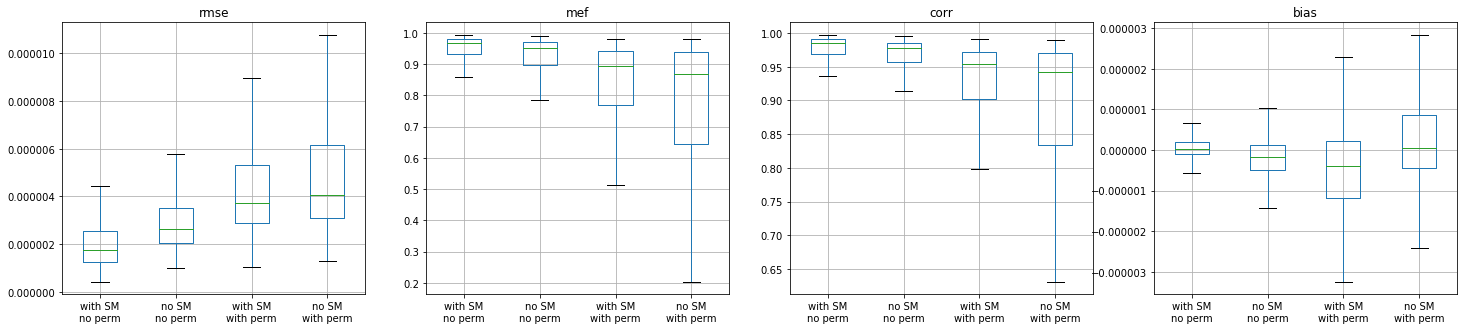

In [10]:
mef  = xr.Dataset({'with SM\nno perm': met_wn.mef,  'no SM\nno perm': met_nn.mef,  'with SM\nwith perm': met_ww.mef,  'no SM\nwith perm': met_nw.mef}).to_dataframe()
rmse = xr.Dataset({'with SM\nno perm': met_wn.rmse, 'no SM\nno perm': met_nn.rmse, 'with SM\nwith perm': met_ww.rmse, 'no SM\nwith perm': met_nw.rmse}).to_dataframe()
corr = xr.Dataset({'with SM\nno perm': met_wn.corr, 'no SM\nno perm': met_nn.corr, 'with SM\nwith perm': met_ww.corr, 'no SM\nwith perm': met_nw.corr}).to_dataframe()
bias = xr.Dataset({'with SM\nno perm': met_wn.bias, 'no SM\nno perm': met_nn.bias, 'with SM\nwith perm': met_ww.bias, 'no SM\nwith perm': met_nw.bias}).to_dataframe()

fig, ax = plt.subplots(1, 4, figsize=(25, 5))
rmse.boxplot(showfliers=False, ax=ax[0])
ax[0].set_title('rmse')
mef.boxplot(showfliers=False, ax=ax[1])
ax[1].set_title('mef')
corr.boxplot(showfliers=False, ax=ax[2])
ax[2].set_title('corr')
bias.boxplot(showfliers=False, ax=ax[3])
ax[3].set_title('bias')

Text(0.5, 1.0, 'bias')

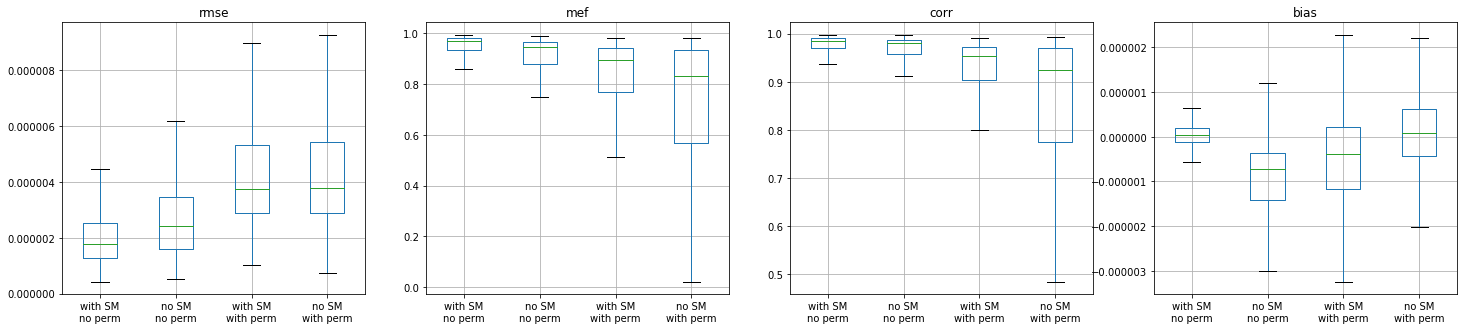

In [5]:
mef  = xr.Dataset({'with SM\nno perm': met_wn.mef,  'no SM\nno perm': met_nn.mef,  'with SM\nwith perm': met_ww.mef,  'no SM\nwith perm': met_nw.mef}).to_dataframe()
rmse = xr.Dataset({'with SM\nno perm': met_wn.rmse, 'no SM\nno perm': met_nn.rmse, 'with SM\nwith perm': met_ww.rmse, 'no SM\nwith perm': met_nw.rmse}).to_dataframe()
corr = xr.Dataset({'with SM\nno perm': met_wn.corr, 'no SM\nno perm': met_nn.corr, 'with SM\nwith perm': met_ww.corr, 'no SM\nwith perm': met_nw.corr}).to_dataframe()
bias = xr.Dataset({'with SM\nno perm': met_wn.bias, 'no SM\nno perm': met_nn.bias, 'with SM\nwith perm': met_ww.bias, 'no SM\nwith perm': met_nw.bias}).to_dataframe()

fig, ax = plt.subplots(1, 4, figsize=(25, 5))
rmse.boxplot(showfliers=False, ax=ax[0])
ax[0].set_title('rmse')
mef.boxplot(showfliers=False, ax=ax[1])
ax[1].set_title('mef')
corr.boxplot(showfliers=False, ax=ax[2])
ax[2].set_title('corr')
bias.boxplot(showfliers=False, ax=ax[3])
ax[3].set_title('bias')

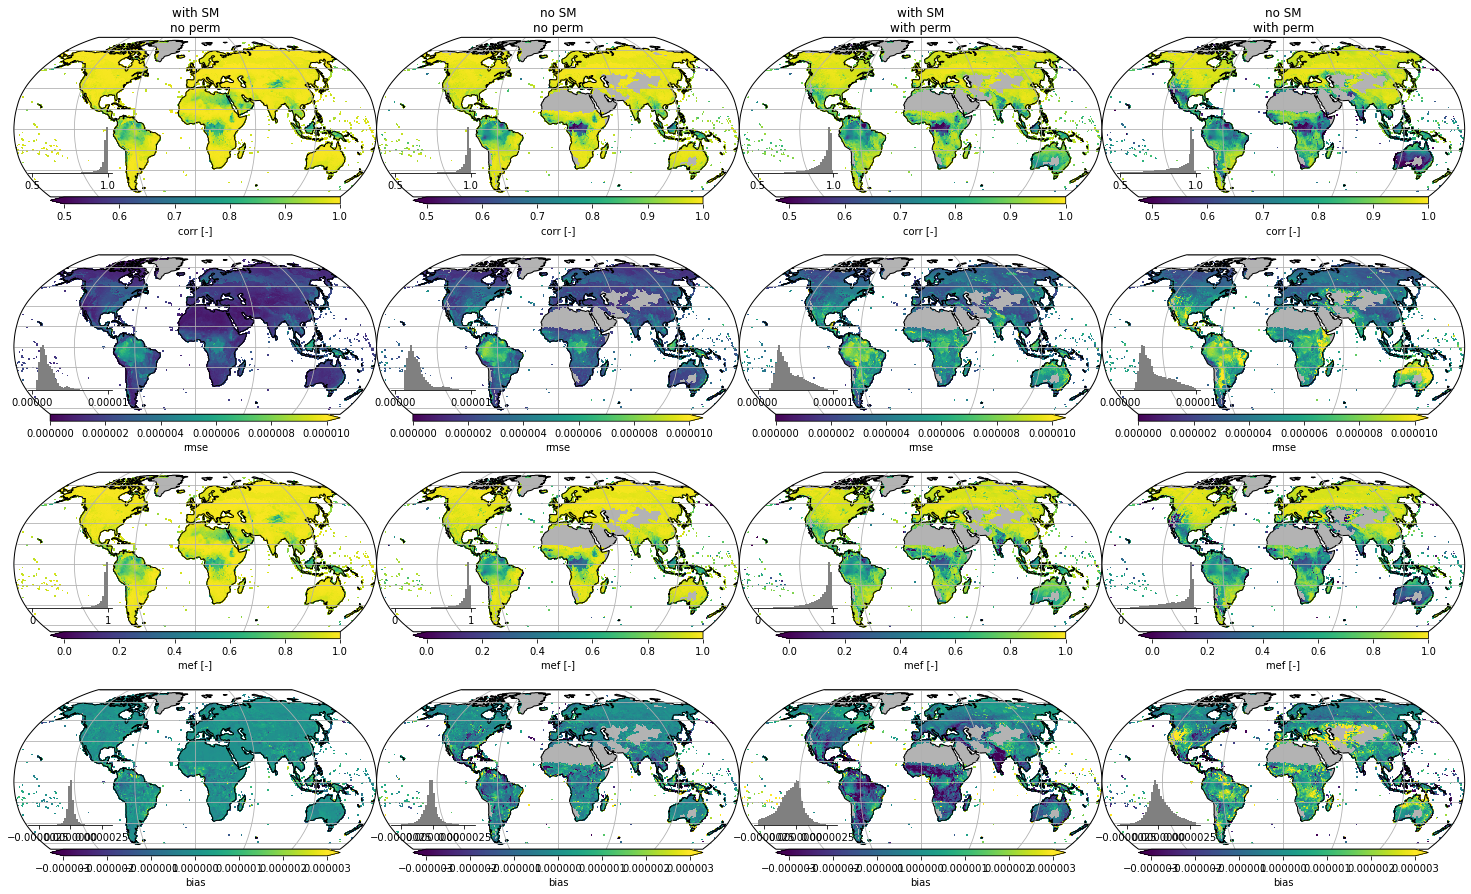

In [11]:
fig, axes = subplots_robinson(4, 4, figsize=(26, 16), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})

for i, (ds, title) in enumerate(zip([met_wn, met_nn, met_ww , met_nw], ['with SM\nno perm', 'no SM\nno perm', 'with SM\nwith perm', 'no SM\nwith perm'])):
    ax = axes[:, i]
    plot_map(ds.corr, vmin=0.5, vmax=1, ax=ax[0])
    plot_map(ds.rmse, vmin=0, vmax=0.00001, ax=ax[1])
    plot_map(ds.mef, vmin=0, vmax=1, ax=ax[2])
    plot_map(ds.bias, vmin=-0.000003, vmax=0.000003, ax=ax[3])
    ax[0].set_title(title)

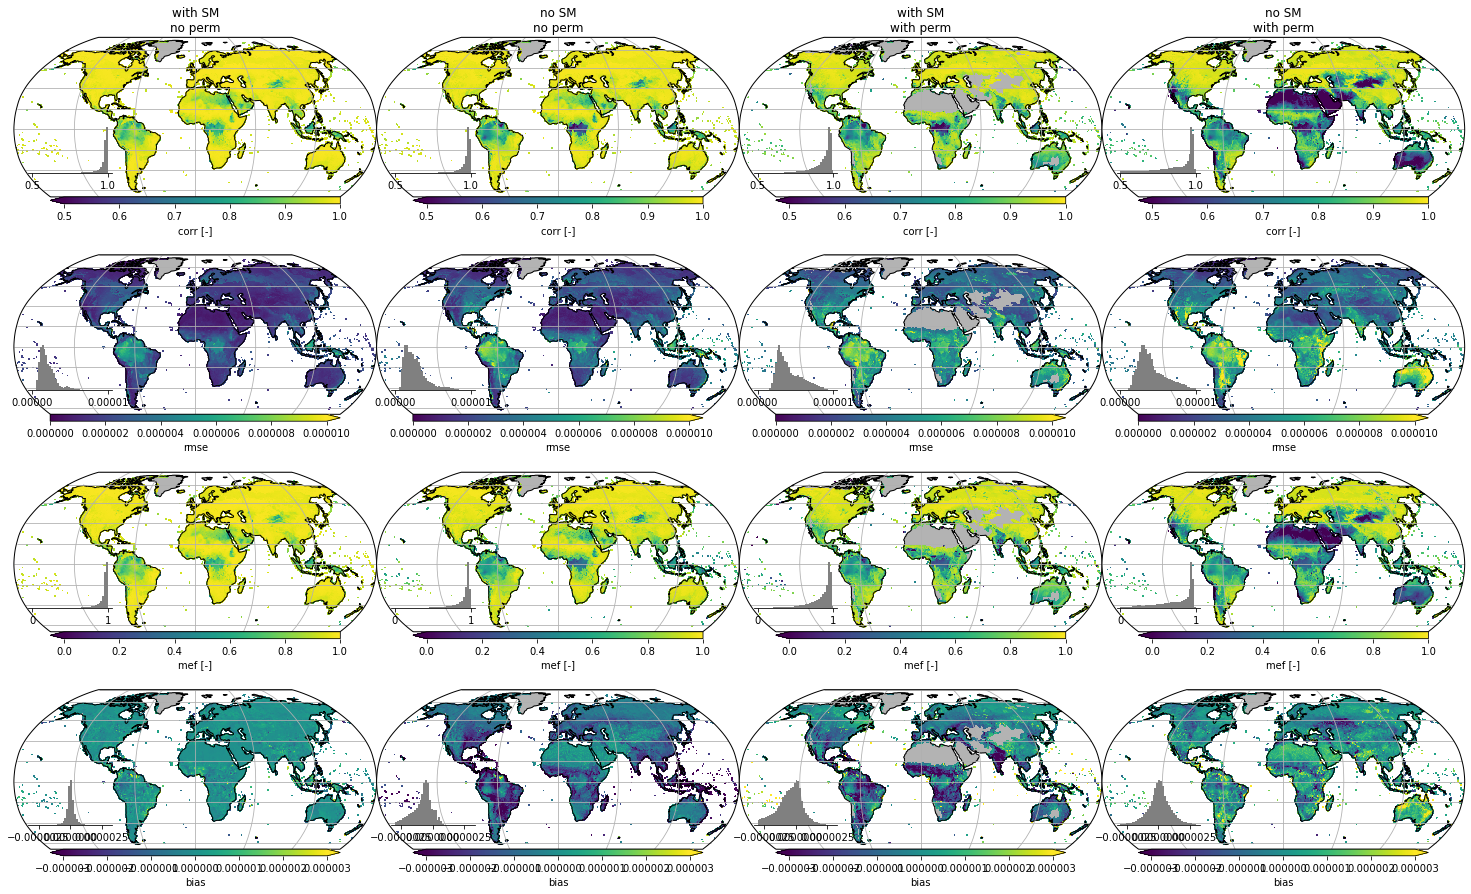

In [6]:
fig, axes = subplots_robinson(4, 4, figsize=(26, 16), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})

for i, (ds, title) in enumerate(zip([met_wn, met_nn, met_ww , met_nw], ['with SM\nno perm', 'no SM\nno perm', 'with SM\nwith perm', 'no SM\nwith perm'])):
    ax = axes[:, i]
    plot_map(ds.corr, vmin=0.5, vmax=1, ax=ax[0])
    plot_map(ds.rmse, vmin=0, vmax=0.00001, ax=ax[1])
    plot_map(ds.mef, vmin=0, vmax=1, ax=ax[2])
    plot_map(ds.bias, vmin=-0.000003, vmax=0.000003, ax=ax[3])
    ax[0].set_title(title)

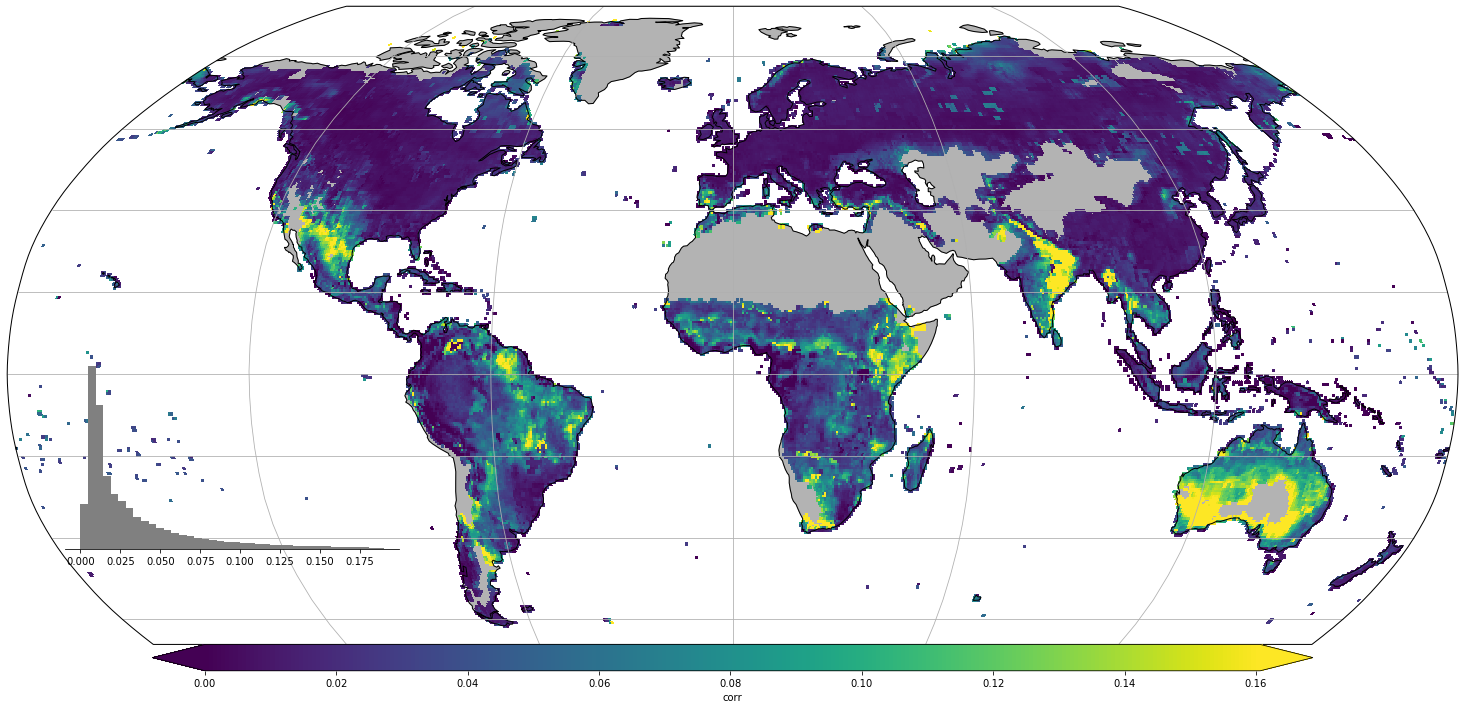

In [12]:
fig, axes = subplots_robinson(figsize=(26, 16), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})
plot_map((met_nn.corr-met_nw.corr)-(met_ww.corr-met_nw.corr), ax=axes, vmin=0, robust=True)

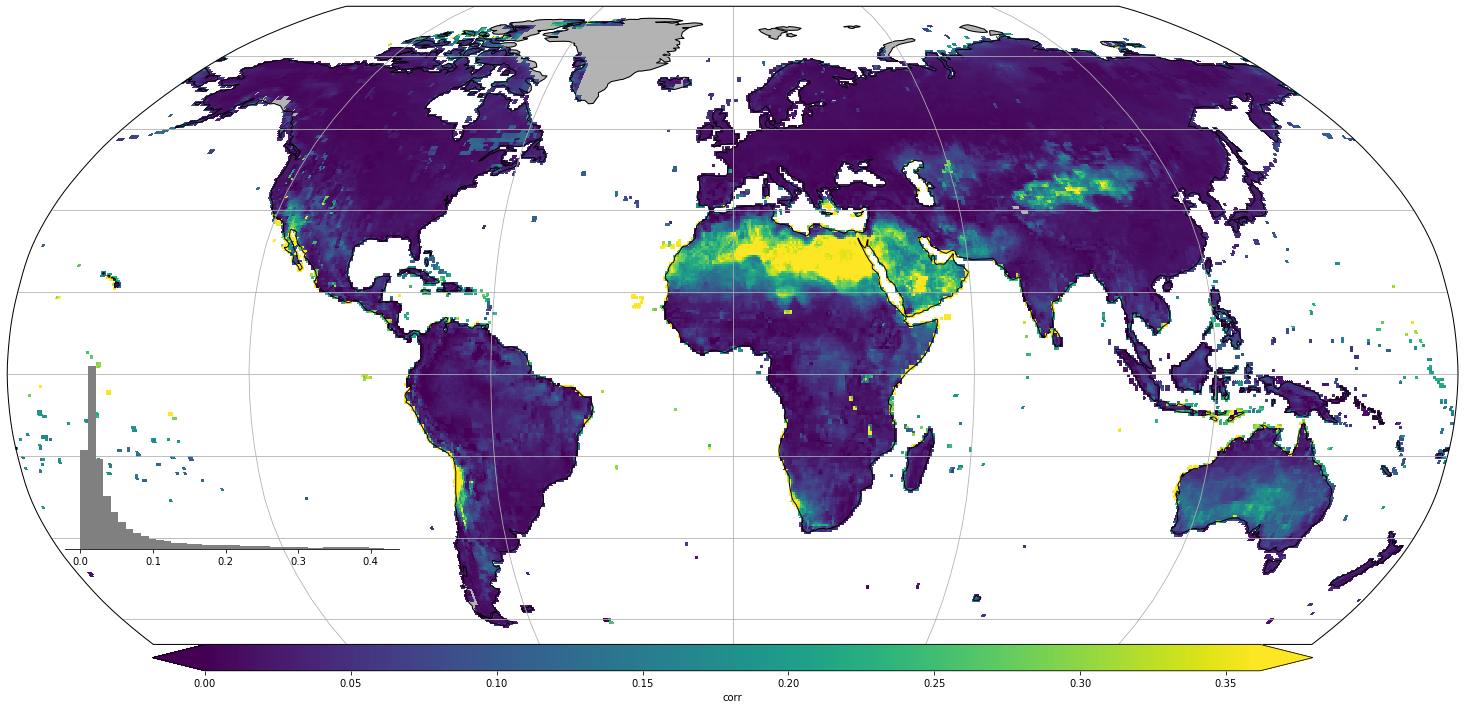

In [19]:
fig, axes = subplots_robinson(figsize=(26, 16), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})
plot_map((met_nn.corr-met_nw.corr)-(met_ww.corr-met_nw.corr), ax=axes, vmin=0, robust=True)

In [46]:
dst_nn_msc = dst_nn.groupby('time.dayofyear').mean('time')

In [56]:
dst_nn

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 5114)
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2013-12-31
Data variables:
    mod      (time, lat, lon) float32 dask.array<chunksize=(5114, 15, 15), meta=np.ndarray>
    obs      (time, lat, lon) float32 dask.array<chunksize=(5114, 15, 15), meta=np.ndarray>
Attributes:
    contact:      bkraft@bgc-jena.mpg.de, sbesnard@bgc-jena.mpg.de
    created:      Dec 07 2019
    description:  LSTM emulation of physical process model (Koirala et al. (2...
    long_name:    total evapotranspiration
    var:          et

In [62]:
with ProgressBar():
    msc = dst_nn.groupby('time.dayofyear').mean('time')
    msc.to_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_to_msc.zarr/')

[########################################] | 100% Completed | 31min 25.8s


In [63]:
with ProgressBar():
    msc = dst_ww.groupby('time.dayofyear').mean('time')
    msc.to_zarr('/scratch/dl_chapter14/experiments/et/w_sm.w_perm/inference/pred_to_msc.zarr/')

[########################################] | 100% Completed | 30min 30.1s


In [ ]:
with ProgressBar():
    msc = dst_nw.groupby('time.dayofyear').mean('time')
    msc.to_zarr('/scratch/dl_chapter14/experiments/et/n_sm.w_perm/inference/pred_to_msc.zarr/')

[#####                                   ] | 13% Completed |  5min 29.9s

In [ ]:
with ProgressBar():
    msc = dst_wn.groupby('time.dayofyear').mean('time')
    msc.to_zarr('/scratch/dl_chapter14/experiments/et/w_sm.n_perm/inference/pred_to_msc.zarr/')

In [82]:
with ProgressBar():
    msc = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_to_msc.zarr/')
    (dst_nn - msc).to_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_to_ano.zarr/')

[######################                  ] | 55% Completed | 28min 19.7s


KeyboardInterrupt: 

In [ ]:
with ProgressBar():
    msc = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.w_perm/inference/pred_to_msc.zarr/')
    (dst_ww - msc).to_zarr('/scratch/dl_chapter14/experiments/et/w_sm.w_perm/inference/pred_to_ano.zarr/')

In [ ]:
with ProgressBar():
    msc = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.w_perm/inference/pred_to_msc.zarr/')
    (dst_nw - msc).to_zarr('/scratch/dl_chapter14/experiments/et/n_sm.w_perm/inference/pred_to_ano.zarr/')

In [ ]:
with ProgressBar():
    msc = xr.open_zarr('/scratch/dl_chapter14/experiments/et/w_sm.n_perm/inference/pred_to_msc.zarr/')
    (dst_wn - msc).to_zarr('/scratch/dl_chapter14/experiments/et/w_sm.n_perm/inference/pred_to_ano.zarr/')

In [80]:
(dst_nn - msc)

<xarray.Dataset>
Dimensions:  (dayofyear: 366, lat: 360, lon: 720, time: 5114)
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2013-12-31
Dimensions without coordinates: dayofyear
Data variables:
    mod      (time, lat, lon, dayofyear) float32 dask.array<chunksize=(5114, 15, 15, 1), meta=np.ndarray>
    obs      (time, lat, lon, dayofyear) float32 dask.array<chunksize=(5114, 15, 15, 1), meta=np.ndarray>

In [81]:
msc

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 360, lon: 720)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
  * lat        (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables:
    mod        (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    obs        (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 15, 15), meta=np.ndarray>

In [17]:
msc = xr.open_zarr('/scratch/dl_chapter14/experiments/et/n_sm.n_perm/inference/pred_to_msc.zarr/')

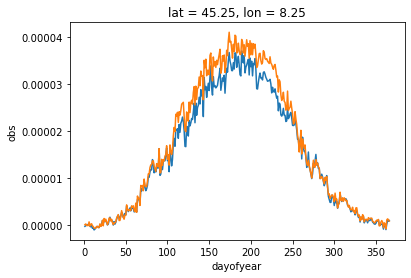

In [18]:
msc.sel(lat=45, lon=8, method='nearest').mod.plot()
msc.sel(lat=45, lon=8, method='nearest').obs.plot()

In [61]:
xr.apply_ufunc(
    calc_msc_ano, dst_nn,
    dask='parallelized',
    output_dtypes=[float]
).compute()

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [52]:
with ProgressBar():
    dst_nn_msc = dst_nn.groupby('time.dayofyear').mean('time').compute()

KeyboardInterrupt: 

In [14]:
def plot_time_series(
        x, y,
        xlabel='mod', ylabel='obs',
        timeagg=None,
        title='',
        ax=None,
        figsize=(15, 5),
        subplot_kw={},
        **kwargs):

    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.subplot(**subplot_kw)

    if timeagg is not None:
        x = x.resample(time=timeagg).mean()
        y = y.resample(time=timeagg).mean()

    time = x.time.values

    x_m = x.mean(dim=['lat', 'lon'])
    y_m = y.mean(dim=['lat', 'lon'])

    x_qs = xr_quantile(x, [0.25, 0.75], dim=['lat', 'lon'])
    y_qs = xr_quantile(y, [0.25, 0.75], dim=['lat', 'lon'])

    ax.fill_between(time, x_qs.isel(quantile=0), x_qs.isel(quantile=1), alpha=0.2, facecolor='tab:blue', label=r'$modeled_{q0.2-0.8}$')
    ax.fill_between(time, y_qs.isel(quantile=0), y_qs.isel(quantile=1), alpha=0.2, facecolor='k', label=r'$observed_{q0.2-0.8}$')
    ax.plot(time, x_m, alpha=1.0, color='tab:blue', linewidth=2., label=r'$modeled_{median}$')
    ax.plot(time, y_m, color='k', linewidth=1.2, linestyle='--', label=r'$observed_{median}$')

    # ax.text(0.05, 0.95, f'r={r:.3f}', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
    
    # ax.set_ylabel(var)
    
    ax.legend()

    ax.patch.set_facecolor('white')

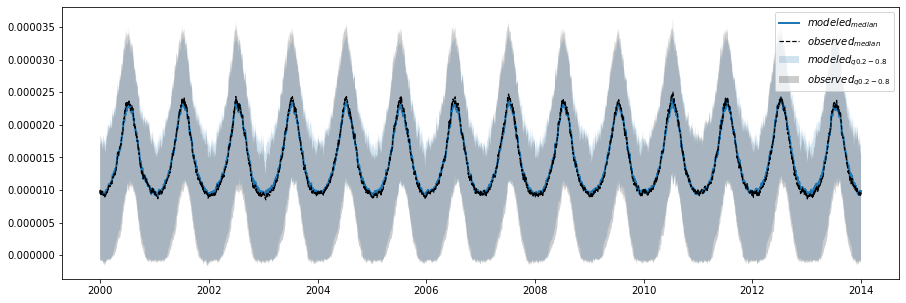

In [15]:
plot_time_series(dss.mod, dss.obs)

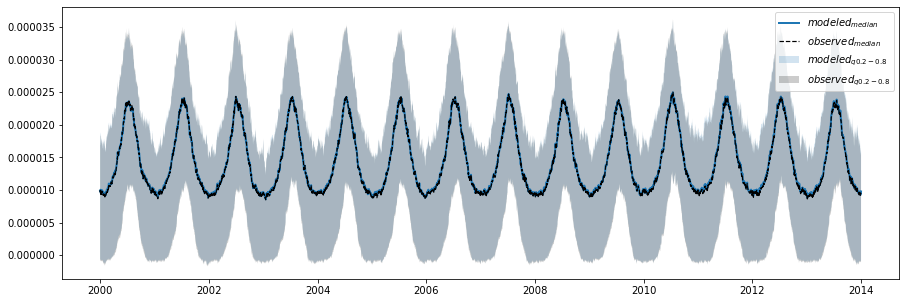

In [76]:
plot_time_series(dss.mod, dss.obs)

In [82]:
ts = dst_nw.sel(lat=46, lon=8, method='nearest')

In [80]:
ts

<xarray.Dataset>
Dimensions:  (time: 5114)
Coordinates:
    lat      float64 46.25
    lon      float64 8.25
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2013-12-31
Data variables:
    mod      (time) float32 dask.array<chunksize=(5114,), meta=np.ndarray>
    obs      (time) float32 dask.array<chunksize=(5114,), meta=np.ndarray>
Attributes:
    contact:      bkraft@bgc-jena.mpg.de, sbesnard@bgc-jena.mpg.de
    created:      Dec 08 2019
    description:  LSTM emulation of physical process model (Koirala et al. (2...
    long_name:    total evapotranspiration
    var:          et

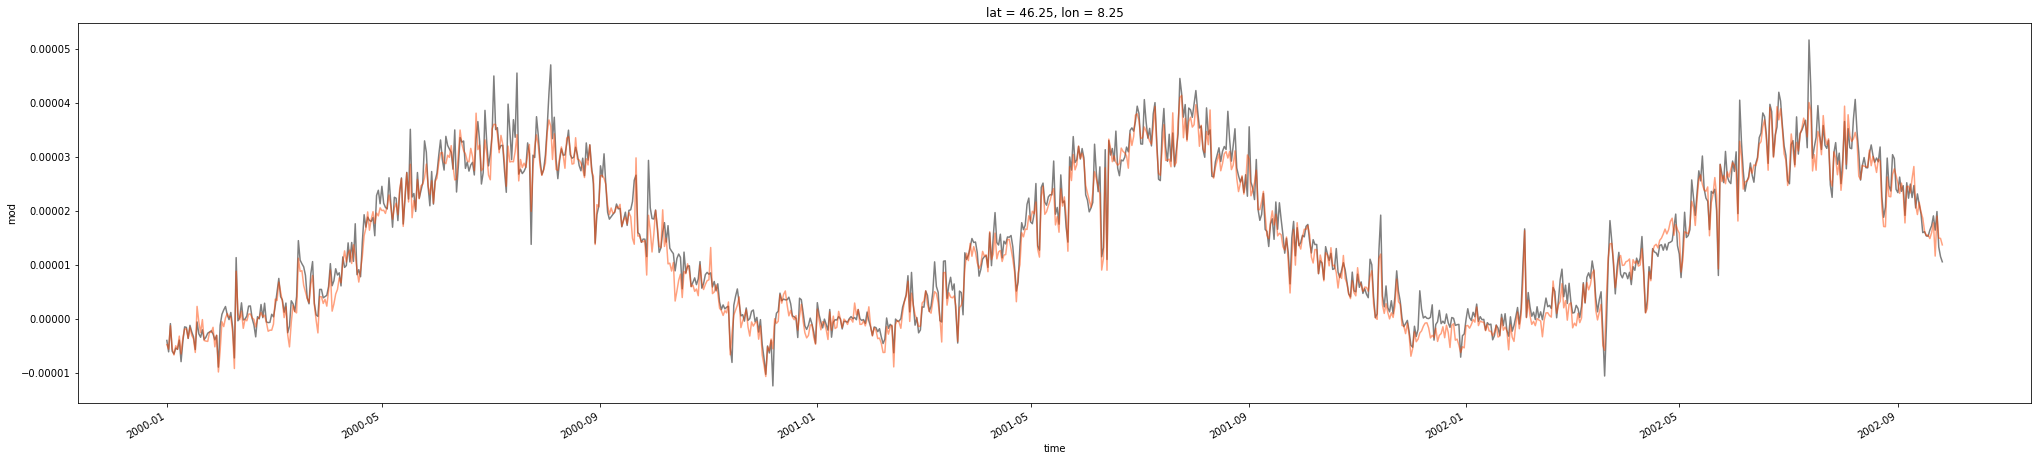

In [76]:
plt.figure(figsize=(35, 7))
ts.obs.isel(time=slice(0, 1000)).plot(alpha=0.5, color='k')
ts.mod.isel(time=slice(0, 1000)).plot(color='orangered', alpha=0.5)

In [74]:
%time dst_nn_msc = dst_nn.groupby('time.dayofyear').mean().compute()

KeyboardInterrupt: 

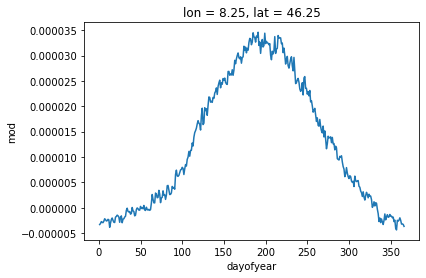

In [60]:
ts_msc.mod.plot()

In [69]:
dst_nn_msc

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 360, lon: 720)
Coordinates:
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat        (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    mod        (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    obs        (dayofyear, lat, lon) float32 dask.array<chunksize=(1, 15, 15), meta=np.ndarray>

In [73]:
dst_nn_msc.mod.values[1, 1, 1]

KeyboardInterrupt: 

KeyboardInterrupt: 

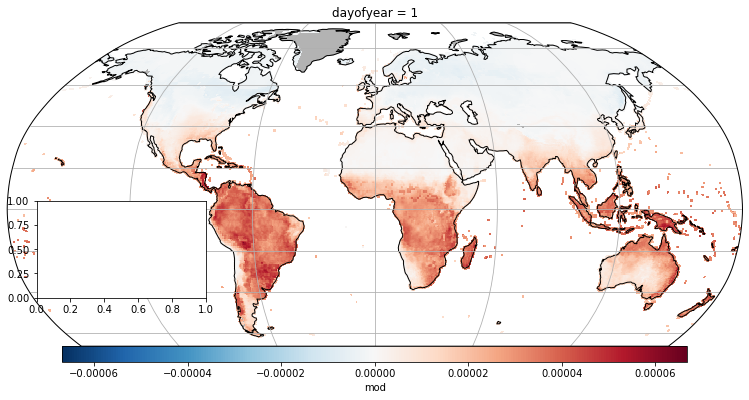

In [70]:
plot_map(dst_nn_msc.mod.isel(dayofyear=0))

In [ ]:
plot_map(dst_nn_msc.obs.isel(dayofyear=0))

In [26]:
def _single_xr_quantile(x, q, dim):
    if isinstance(dim, str):
        dim = [dim]
    ndims = len(dim)
    axes = tuple(np.arange(ndims)-ndims)
    m = xr.apply_ufunc(
        np.nanquantile, x,
        input_core_dims=[dim],
        dask='parallelized',
        output_dtypes=[float],
        keep_attrs=True,
        kwargs={'q': q, 'axis': axes})
    m.name = 'quantile'
    return m

def xr_quantile(x, q, dim):
    if not hasattr([1, 2], '__iter__'):
        q = [q]
    quantiles = []
    for i, q_ in enumerate(q):
        r = _single_xr_quantile(x, q_, dim).compute()
        quantiles.append(r)
    quantiles = xr.concat(quantiles, 'quantile')
    quantiles['quantile'] = q
    quantiles.attrs.update({**x.attrs})


    return quantiles

In [80]:
qs = xr_quantile(dss.obs, [0.25, 0.5, 0.75], dim=['lat', 'lon'])

In [84]:
qs

<xarray.DataArray 'quantile' (quantile: 3, time: 5478)>
array([[1.83738948e-10, 2.04982260e-10, 2.16509324e-10, ...,
        2.74700290e-10, 2.71642167e-10, 2.85568819e-10],
       [5.45322166e-07, 5.53611130e-07, 5.48898129e-07, ...,
        5.88953355e-07, 6.00083808e-07, 6.16812031e-07],
       [5.49330184e-06, 5.59299383e-06, 5.64336187e-06, ...,
        6.35672814e-06, 6.31667422e-06, 6.43782687e-06]])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2014-12-30
  * quantile  (quantile) float64 0.25 0.5 0.75
Attributes:
    long_name:  Total runoff
    units:      kg/m2/s

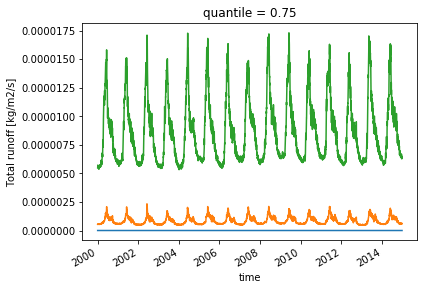

In [85]:
qs.isel(quantile=0).plot()
qs.isel(quantile=1).plot()
qs.isel(quantile=2).plot()

In [55]:
med.

<xarray.DataArray 'rmse' (time: 5478)>
array([5.45322166e-07, 5.53611130e-07, 5.48898129e-07, ...,
       5.88953355e-07, 6.00083808e-07, 6.16812031e-07])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2014-12-30
Attributes:
    long_name:  rmse
    units:      kg/m2/s

In [49]:
xr.merge(qs)

MergeError: conflicting values for variable 'rmse' on objects to be combined. You can skip this check by specifying compat='override'.

In [44]:
med = xr_quantile(dss.obs, [0.25, 0.75], dim=['lat', 'lon']).compute()

ValueError: replacement data must match the Variable's shape

In [ ]:
plt.plot(med)

In [16]:
med = xr_median(dst.obs, dim=['time']).compute()

['lat', 'lon']


/opt/conda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:994: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


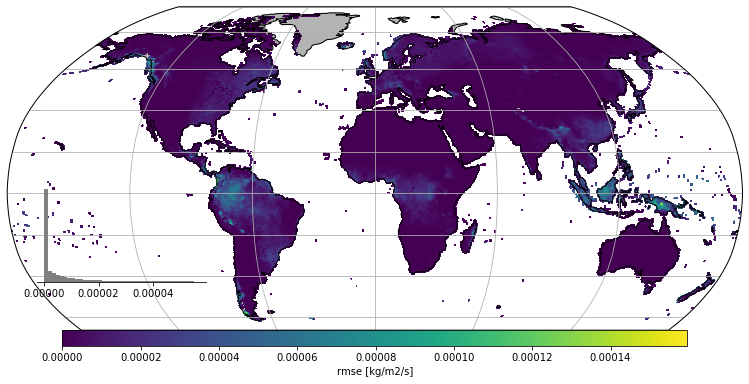

In [19]:
plot_map(med)

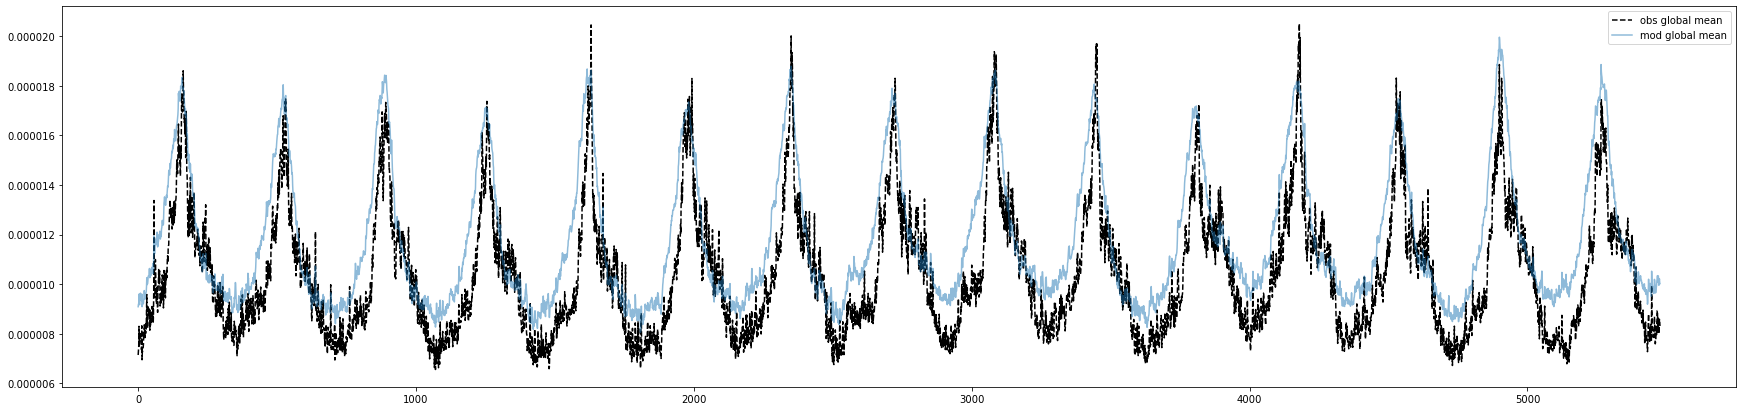

In [40]:
plt.figure(figsize=(30, 7))

plt.plot(dss.obs.mean(('lat', 'lon')), 'k--', label='obs global mean')
plt.plot(dss.mod.mean(('lat', 'lon')), alpha=0.5, label='mod global mean')
plt.legend()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def f0(x):
    return x**(-0.5)
def f1(x):
    return x**(-0.2) + 0.01 * x
def f_gl(x):
    gl = np.zeros_like(x)
    for t, v in enumerate(x):
        gl[t] = 100 * (v / np.min(x[:t+1]) - 1)
    return gl
def f_min(x):
    m = np.zeros_like(x)
    for t, v in enumerate(x):
        m[t] = np.min(x[:t+1])
    return m

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


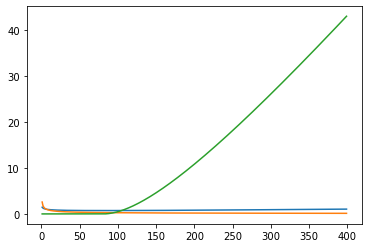

In [124]:
t = np.linspace(0, 60, 400)
e_tr = f0(t)
e_va = f1(t)
gl = f_gl(e_va)
gl_tr = f_gl(e_tr)
plt.plot(e_va)
plt.plot(e_tr)
plt.plot(gl)
# plt.plot(gl_tr)

In [141]:
def f_gl(x):
    per_impr = np.zeros_like(x)
    for t in range(1, len(x)):
        per_impr[t] = 100 * (1 - x[t] / x[t-1])
    return per_impr

In [142]:
gl = f_gl(e_va)

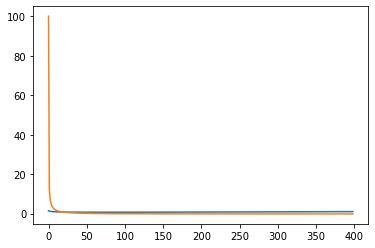

In [143]:
plt.plot(e_va[1:])
plt.plot(gl[1:])

In [34]:
import pandas as pd

In [46]:
df = pd.read_csv('/scratch/dl_chapter14/experiments/hydro/default/tune/hydro/Emulator_117_dropout_in=0.6,dropout_linear=0.1,dropout_lstm=0.6,batch_size=32,dynamic_path=_scratch_dl_chapter14_input_dynamic_gsw_2019-11-14_08-49-30_h07l5k6/progress.csv')
df.keys()

Index(['epoch', 'loss_train', 'loss_eval', 'patience_counter', 'perc_improved',
       'best_loss', 'done', 'timesteps_total', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

In [199]:
df

epoch    loss_train     loss_eval  patience_counter  perc_improved  \
0       1  1.300028e-09  5.944167e-10                 0       0.000000   
1       2  1.309272e-09  5.815003e-10                 0       2.172953   
2       3  1.274369e-09  5.733385e-10                 0       1.403578   
3       4  1.194475e-09  5.709449e-10                 0       0.417483   
4       5  1.250227e-09  5.724166e-10                 1      -0.257755   
5       6  1.119440e-09  5.715308e-10                 2      -0.102611   
6       7  1.130880e-09  5.606235e-10                 0       1.807775   
7       8  1.091978e-09  5.612418e-10                 1      -0.110277   
8       9  9.497963e-10  5.516027e-10                 0       1.609082   
9      10  9.247447e-10  5.443904e-10                 0       1.307516   
10     11  9.631717e-10  5.617979e-10                 1      -3.197619   
11     12  9.463403e-10  5.605630e-10                 2      -2.970789   
12     13  1.103881e-09  5.661549e-10                 3      -3.997972   
13     14  9.670571e-10  5.479878e-10                 4      -0.660821   
14     15  9.473375e-10  5.287011e-10                 0       2.881980   
15     16  9.570033e-10  5.301442e-10                 1      -0.272943   
16     17  9.186568e-10  5.275978e-10                 0       0.208683   
17     18  9.150763e-10  5.542761e-10                 1      -5.056553   
18     19  8.831766e-10  5.336039e-10                 2      -1.138390   
19     20  8.884385e-10  5.338596e-10                 3      -1.186853   
20     21  8.721962e-10  5.214829e-10                 0       1.159006   
21     22  9.965114e-10  5.160251e-10                 0       1.046592   
22     23  8.476976e-10  5.441101e-10                 1      -5.442553   
23     24  8.803124e-10  5.109989e-10                 0       0.974033   
24     25  8.661544e-10  5.159316e-10                 1      -0.965314   
25     26  8.650719e-10  5.187557e-10                 2      -1.517978   
26     27  8.771734e-10  5.048547e-10                 0       1.202390   
27     28  9.151978e-10  5.034953e-10                 0       0.269270   
28     29  8.617394e-10  5.010282e-10                 0       0.489988   
29     30  8.480771e-10  5.025716e-10                 1      -0.308047   
30     31  8.803456e-10  5.053317e-10                 2      -0.858928   
31     32  8.222376e-10  4.990386e-10                 0       0.397096   
32     33  8.493693e-10  5.112136e-10                 1      -2.439678   
33     34  7.962144e-10  5.277324e-10                 2      -5.749813   
34     35  7.980190e-10  4.928761e-10                 0       1.234885   
35     36  7.861054e-10  4.937526e-10                 1      -0.177845   
36     37  7.938770e-10  4.932609e-10                 2      -0.078071   
37     38  8.267287e-10  4.937453e-10                 3      -0.176356   
38     39  8.246825e-10  4.964349e-10                 4      -0.722057   
39     40  8.349488e-10  4.952048e-10                 5      -0.472469   

       best_loss   done  timesteps_total  episodes_total  training_iteration  \
0   5.944167e-10  False              NaN             NaN                   1   
1   5.815003e-10  False              NaN             NaN                   2   
2   5.733385e-10  False              NaN             NaN                   3   
3   5.709449e-10  False              NaN             NaN                   4   
4   5.709449e-10  False              NaN             NaN                   5   
5   5.709449e-10  False              NaN             NaN                   6   
6   5.606235e-10  False              NaN             NaN                   7   
7   5.606235e-10  False              NaN             NaN                   8   
8   5.516027e-10  False              NaN             NaN                   9   
9   5.443904e-10  False              NaN             NaN                  10   
10  5.443904e-10  False              NaN             NaN                  11   
11  5.443

In [45]:
plt.plot(df['wloss_eval'])

KeyError: 'wloss_eval'

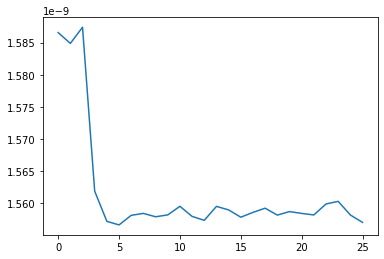

In [43]:
plt.plot(df['loss_eval'])

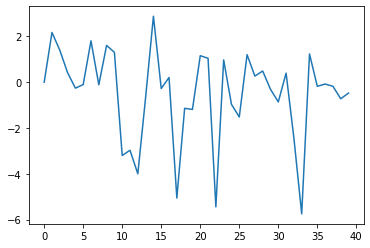

In [201]:
plt.plot(df['perc_improved'])

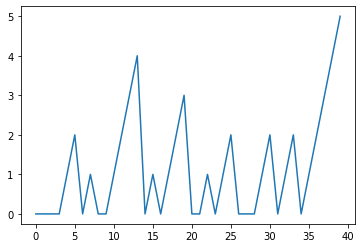

In [202]:
plt.plot(df['patience_counter'])

In [23]:
l = {'a': 1, 'b': 2}
options_str = ", ".join(l.keys())
print(f'[{options_str}]')

[a, b]


'a, b'

In [30]:
print(f'{getattr.__name__}')

getattr


In [31]:
from datetime import datetime

In [33]:
tic = datetime.now()

In [34]:
tic.strftime("%m/%d/%Y, %H:%M:%S")

'11/11/2019, 09:38:00'

In [35]:
toc = datetime.now()

In [42]:
elapsed = toc- tic

In [43]:
elapsed.seconds

302

In [45]:
mins = int(elapsed.seconds/60)
mins

5

In [46]:
secs = int(elapsed.seconds - 60 * mins)
secs

2

In [3]:
import xarray as xr
import numpy as np
import zarr

In [11]:
ds_ssd = zarr.open_group('/scratch/dl_chapter14/experiments/hydro/default/pred/predictions.zarr/')
ds_ram = zarr.open_group('/run/user/196')
ds_ram.tree()

/
 ├── lat (360,) float32
 ├── lon (720,) float32
 ├── mrro (5478, 360, 720) float32
 ├── mrro_obs (5478, 360, 720) float32
 └── time (5478,) int64

In [14]:
def read_zarr(ds, n):
    for i in range(n):
        lat = np.random.choice(360)
        lon = np.random.choice(720)
        s = ds['mrro'][:, lat, lon] + 1

In [15]:
%time read_zarr(ds_ssd, 1000)

CPU times: user 300 ms, sys: 2.21 s, total: 2.51 s
Wall time: 2.5 s


In [16]:
%time read_zarr(ds_ssd, 1000)

CPU times: user 288 ms, sys: 2.27 s, total: 2.56 s
Wall time: 2.55 s


In [17]:
ls -l /run/user/1968

ls: cannot access '/run/user/1968': No such file or directory


In [ ]:
/scratch/

In [6]:
import torch
import numpy as np

In [8]:
class RNN(torch.nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = torch.nn.RNN(1, 5)
    def forward(self, x):
        out = self.rnn(x)
        return out


In [2]:
import xarray as xr

In [3]:
ds = xr.open_zarr('/scratch/dl_chapter14/experiments/hydro/default/pred/predictions.zarr/')

In [45]:
ds

<xarray.DataArray 'rzwc' (time: 23741, lat: 360, lon: 720)>
dask.array<zarr, shape=(23741, 360, 720), dtype=float32, chunksize=(23741, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Attributes:
    long_name:  Root zone soil moisture
    units:      kg/m2

In [ ]:
pred = xr.Dataset({
    'obs': xr.DataArray(ds.values, coords=[ds.lat, ds.lon, ds.time]),
    'mod': xr.DataArray(ds.values, coords=[ds.lat, ds.lon, ds.time])
})
pred.attrs = ds.attrs

In [30]:
xr.Dataset({
    'mod': xr.DataArray(ds.mrro.values, coords=[dslat, ds.lon, ds.time),
    'obs': xr.ones_like(ds.coords) * ds.mrro.values
})

TypeError: Expected DataArray, Dataset, or Variable

In [21]:
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 5478)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2014-12-30
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    mrro     (time, lat, lon) float32 dask.array<chunksize=(5478, 10, 10), meta=np.ndarray>
Attributes:
    citation:     Koirala, Sujan, et al. Global-scale land surface hydrologic...
    contact:      Sujan Koirala <skoirala@bgc-jena.mpg.de> and Hyungjun Kim <...
    experiment:   SP-MIP: Experiment No. 3
    forcing:      GSWP-3 sub-daily
    institution:  Max-Planck-Institute for Biogeochemistry, Jena, Germany; Th...
    model:        MATSIRO LSM with GW Representation
    project:      Soil Parameter Model Intercomparison Project (SP-MIP): Asse...

In [36]:
ds = xr.open_zarr('/scratch/dl_chapter14/target/dynamic/koirala2017.zarr/')
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 23741)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Data variables:
    et       (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    mrro     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    rzwc     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    tws      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    wtd      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
Attributes:
    citation:     Koirala, Sujan, et al. Global-scale land surface hydrologic...
    contact:      Sujan Koirala <skoirala@bgc-jena.mpg.de> and Hyungjun Kim <...
    experiment:   SP-MIP: Experiment No. 3
 

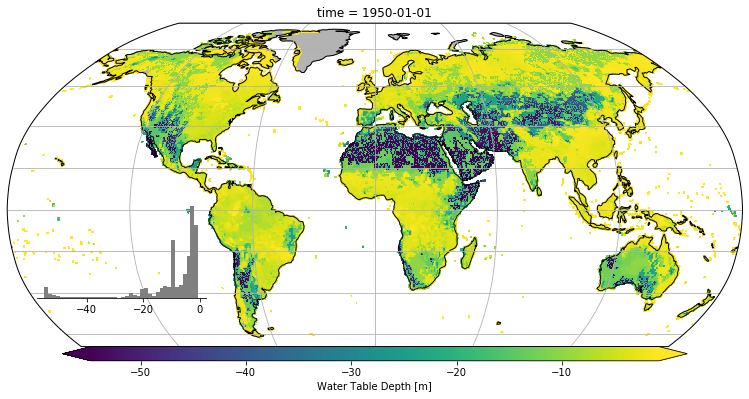

In [39]:
plot_map(ds.wtd.isel(time=0), robust=True)

In [113]:
p = xr.open_zarr('/scratch/hydrodl/data/bucket.zarr/prec/')

In [117]:
p_missing = p.data.isnull().sum('time').compute()

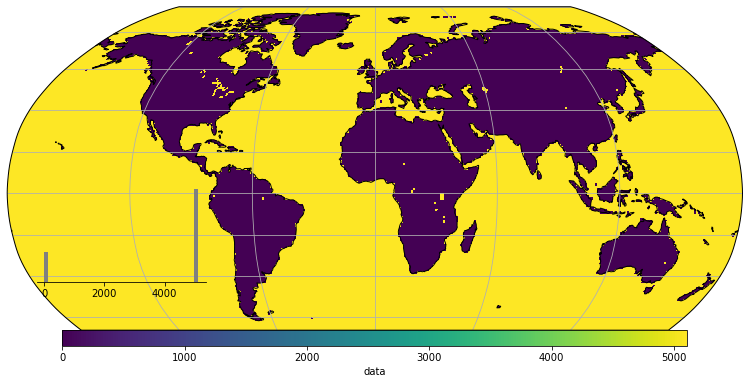

In [119]:
plot_map(p_missing)

In [120]:
xr.open_zarr('/scratch/dl_chapter14/target/dynamic/koirala2017.zarr/')

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 23741)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Data variables:
    et       (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    mrro     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    rzwc     (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    tws      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
    wtd      (time, lat, lon) float32 dask.array<chunksize=(23741, 10, 10), meta=np.ndarray>
Attributes:
    citation:     Koirala, Sujan, et al. Global-scale land surface hydrologic...
    contact:      Sujan Koirala <skoirala@bgc-jena.mpg.de> and Hyungjun Kim <...
    experiment:   SP-MIP: Experiment No. 3
 

In [133]:
xr.open_dataset('/workspace/BGI/people/skoirala/spmip/matsiro-gw.run1_20180805/matsiro-gw_experiment_1_1982.nc')

<xarray.Dataset>
Dimensions:    (lat: 360, level: 13, lon: 720, time: 366)
Coordinates:
  * lat        (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon        (lon) float32 0.25 0.75 1.25 1.75 ... -1.75 -1.25 -0.75 -0.25
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 1983-01-01
  * level      (level) int32 5 20 75 100 100 100 100 100 100 100 100 100 3000
Data variables:
    rss        (time, lat, lon) float32 ...
    hfss       (time, lat, lon) float32 ...
    ec         (time, lat, lon) float32 ...
    ts         (time, lat, lon) float32 ...
    hfls       (time, lat, lon) float32 ...
    et         (time, lat, lon) float32 ...
    cw         (time, lat, lon) float32 ...
    es         (time, lat, lon) float32 ...
    tsl        (time, level, lat, lon) float32 ...
    hfdss      (time, lat, lon) float32 ...
    tws        (time, lat, lon) float32 ...
    mrrob      (time, lat, lon) float32 ...
    albsrfc    (time, lat, lon) float32 ...
    snc  

In [134]:
ds_frac = xr.open_dataset('/workspace/BGI/people/skoirala/spmip/matsiro-gw.run1_20180805/matsiro-gw_experiment_1_1982.nc')['mrlslfrac']
ds = xr.open_dataset('/workspace/BGI/people/skoirala/spmip/matsiro-gw.run1_20180805/matsiro-gw_experiment_1_1982.nc')['rzwc']

In [135]:
ds

<xarray.DataArray 'rzwc' (time: 366, lat: 360, lon: 720)>
[94867200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... -1.75 -1.25 -0.75 -0.25
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 1983-01-01
Attributes:
    long_name:  Root zone soil moisture
    units:      kg/m2

In [124]:
ds_frac_mean = ds_frac.mean(('time', 'level'))
ds_mean = ds.mean(('time', 'level'))

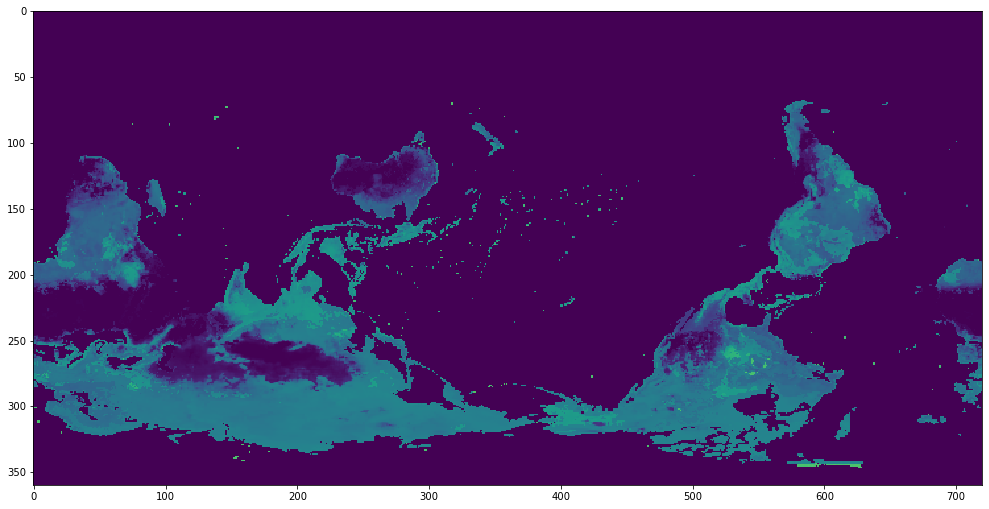

In [130]:
plt.figure(figsize=(17, 12))
plt.imshow(ds_frac_mean.values, vmin=0.2, vmax=0.6)

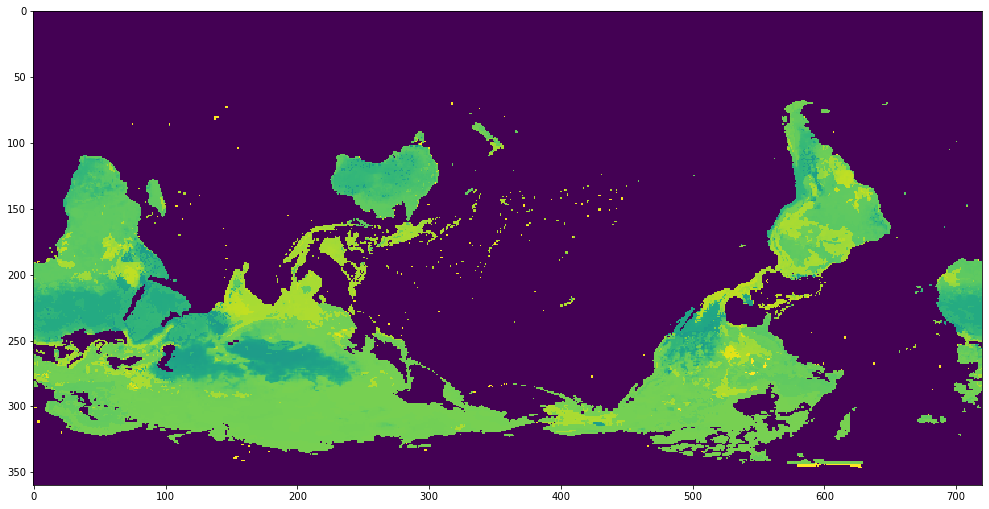

In [132]:
plt.figure(figsize=(17, 12))
plt.imshow(ds_mean.values)

In [ ]:
plot_map(ds_mean)

In [ ]:
"et", "tws", "mrro", "wtd", "mrlslfrac"

In [20]:
t = xr.open_dataset('/workspace/BGI/people/skoirala/spmip/full_matsiro-gw_exp3.run1_20180805_latlonReverse/full_matsiro-gw_exp3_experiment_3_1950.nc')

In [29]:
t

<xarray.Dataset>
Dimensions:    (lat: 360, levelc: 13, levelf: 14, lon: 720, time: 366)
Coordinates:
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 1951-01-01
  * levelf     (levelf) int32 0 5 25 100 200 300 ... 600 700 800 900 1000 4000
  * levelc     (levelc) int32 5 20 75 100 100 100 100 100 100 100 100 100 3000
Data variables:
    rss        (time, lat, lon) float32 ...
    hfss       (time, lat, lon) float32 ...
    gwrec      (time, lat, lon) float32 ...
    ec         (time, lat, lon) float32 ...
    ts         (time, lat, lon) float32 ...
    hfls       (time, lat, lon) float32 ...
    et         (time, lat, lon) float32 ...
    cw         (time, lat, lon) float32 ...
    es         (time, lat, lon) float32 ...
    tsl        (time, levelc, lat, lon) float32 ...
    hfdss      (time, lat, lon) float32 ...
   

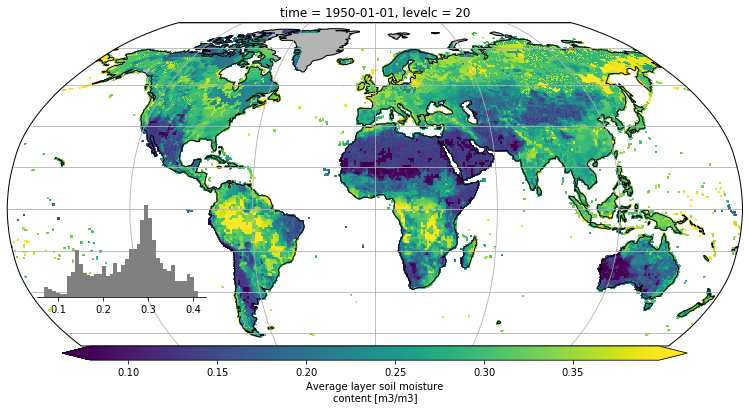

In [26]:
plot_map(t.mrlslfrac.isel(levelc=1, time=0), robust=True)

In [17]:
ls -l /workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/

total 144
drwxrwxr-x 2 895 545 8194 Dec 17  2018 ET/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 IWA/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 LWdown/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 PET_PT/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 PSurf/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 Precip/
drwxrwxr-x 2 895 545 8193 Dec 14  2018 Qair/
drwxrwxr-x 2 895 545 8193 Aug 24  2018 Rainf/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 Rh/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 Rn/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 SWdown/
drwxrwxr-x 2 895 545 8193 Aug 24  2018 Snowf/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 Tair/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 Tmax/
drwxrwxr-x 2 895 545 8193 Aug 21  2018 Tmin/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 WAI1/
drwxrwxr-x 2 895 545 8193 Dec 17  2018 WAI2/
drwxrwxr-x 2 895 545 8193 Aug 24  2018 Wind/


In [ ]:
e


#### input vars

| var  | dims | path |
| ---  | ---  | ---  |
| Rainf  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/Rainf/' |
| Snowf  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/Snowf/' |
| SWdown  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/SWdown/' |
| LWdown  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/LWdown/' |
| Tair  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/Tair/' |
| Wind  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/Wind/' |
| Qair  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/Qair/' |
| PSurf  | lat, lon, time | '/workspace/BGI/data/DataStructureMDI/DATA/grid/Global/0d50_daily/GSWP3/EXP1/Data/PSurf/' |
| lai | lat, lon, time | '/workspace/BGI/work_3/dl_chapter14/input_data/org_data/matsiro-gw_lai.nc' |
| ccover | lat, lon, time | '/workspace/BGI/work_3/dl_chapter14/input_data/org_data/matsiro-gw_lai.nc' |
| PFT | lat, lon | '/workspace/BGI/work_3/dl_chapter14/input_data/org_data/matsiro-gw_PFT.nc' |
| soil_properties | lat, lon | '/workspace/BGI/work_3/dl_chapter14/input_data/org_data/matsiro-gw_soil_propreties.nc' |

#### Target vars

| var  | dims | path |
| ---  | ---  | ---  |
| et (also input) | lat, lon, time | '/workspace/BGI/people/skoirala/spmip/full_matsiro-gw_exp3.run1_20180805_latlonReverse/full_matsiro-gw_exp3_experiment_3_YYYY.nc' |
| mrlslfrac (mean of first 4 levels)  | lat, lon, time | '/workspace/BGI/people/skoirala/spmip/full_matsiro-gw_exp3.run1_20180805_latlonReverse/full_matsiro-gw_exp3_experiment_3_YYYY.nc' |
| tws  | lat, lon, time | '/workspace/BGI/people/skoirala/spmip/full_matsiro-gw_exp3.run1_20180805_latlonReverse/full_matsiro-gw_exp3_experiment_3_YYYY.nc' |
| mrro  | lat, lon, time | '/workspace/BGI/people/skoirala/spmip/full_matsiro-gw_exp3.run1_20180805_latlonReverse/full_matsiro-gw_exp3_experiment_3_YYYY.nc' |


In [1]:
import xarray as xr

In [56]:
d = xr.open_dataset('/workspace/BGI/work_3/dl_chapter14/input_data/org_data/matsiro-gw_soil_propreties.nc')
d

<xarray.Dataset>
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 -90.0 -89.5 -89.0 ... 88.5 89.0 89.5
  * longitude        (longitude) float64 -180.0 -179.5 -179.0 ... 179.0 179.5
Data variables:
    soil_properties  (latitude, longitude) float32 ...

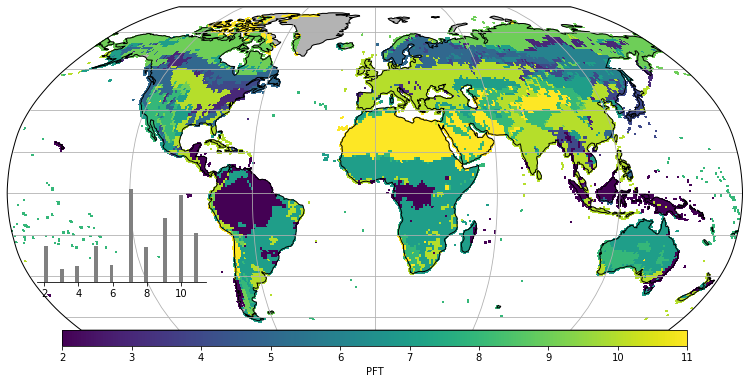

In [16]:
plot_map(d.PFT)

In [ ]:
xr.open